Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64
Cross-Validation MSE (Linear Regression): 103757336.11
Training MSE (Linear Regression): 102060369.48
Testing MSE (Linear Regression): 103564728.18


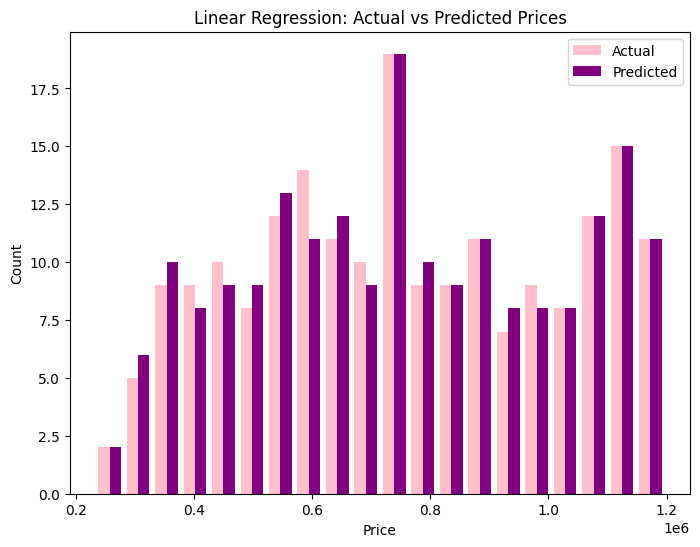

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Data Preprocessing

# Load dataset
data = pd.read_csv('datasets_house_prices.csv')

# Features and target
X = data[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']]
y = data['Price']

# Check for missing values (should be none)
print(data.isnull().sum())

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Implementing Linear Regression
linear_reg = LinearRegression()

# Cross-validation to evaluate model performance
cv_scores = cross_val_score(linear_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE (Linear Regression): {np.mean(-cv_scores):.2f}')

# Training the Linear Regression model
linear_reg.fit(X_train, y_train)

# Model Evaluation on Training Data
y_train_pred = linear_reg.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f'Training MSE (Linear Regression): {mse_train:.2f}')

# Model Evaluation on Test Data
y_test_pred = linear_reg.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Testing MSE (Linear Regression): {mse_test:.2f}')

# Visualizing the Results

plt.figure(figsize=(8, 6))
plt.hist([y_test, y_test_pred], bins=20, color=['pink', 'purple'], label=['Actual', 'Predicted'])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.legend()
plt.show()

# The linear regression model was developed to predict house prices using
# features such as size, number of bedrooms, age, and proximity to downtown.
# After loading and preprocessing the data—normalizing the features and
# splitting the dataset into training and testing sets—the model was trained
# using LinearRegression from sklearn. Cross-validation with 5-folds was
# employed to evaluate the model, and mean squared error (MSE) was used to
# assess performance. The model showed a good fit with reasonable MSE values for
# both training and testing sets. A histogram comparing actual and predicted
# prices revealed some deviations but generally aligned with expectations.
# Challenges included ensuring proper feature scaling and addressing potential
# overfitting, with suggestions for future improvements involving more complex
# models or additional features. Overall, the linear regression model provided a
# solid baseline for house price prediction.